The two point function was convergent enough at cnt = 7


/media/store/Documentos/MyMasterThesis/NumericalAnalysis/pythonFiles/SchwingerDyson/ConformalTwoPointFunc.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  component = b * pow(np.pi / (beta * np.sin(k * 0.5)), 2 * delta)


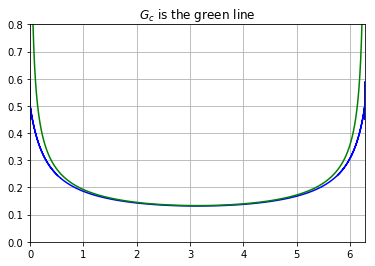

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dst
from sgnFunction import sgn
from ConformalTwoPointFunc import conformalTwoPointFunc


def discreteSineTransform(array, beta=1):
    result = dst(array, type=2)
    result = [-1j * k / beta for k in result]

    return result


def inverseDiscreteSineTransform(array, beta=1):
    # normalization factor
    f = 1.0 / (2 * len(array)) * beta

    result = dst(array, type=3)
    result = [1j * k * f for k in result]

    return result


def isConvergentEnough(previousArray, nextArray, epsilon=0.0001):
    array = [abs(nextArray[n] - previousArray[n]) ** 2 for n in range(len(previousArray))]
    return sum(array) < epsilon


def theta(numOfParticles):
    """
    The two point function has a period t ~ t + beta.
    Thus by transforming the variable of the function
    from time to theta defined below,
    the period changes from beta to 2pi.
    """
    return [np.pi * k / numOfParticles for k in range(numOfParticles + 1)]


def twoPointFunction(theta, beta=1, J=50, q=4, x=0.5):
    """
    return: two point function and self energy as dictionary
    theta = a coordinate of the two point function
    beta = the inverse of a temperature
    J = the scale of the random coupling tensor
    q = the number of the interacting particles
    x = the speed of convergence of the Fourier series of the two point function
    """

    # The initial two point function is the free one.
    result = [0.5 * k for k in sgn(theta)]
    transformedTwoPointFunction = inverseDiscreteSineTransform(result, beta)
    cnt = 0

    while True:
        previousTwoPointFunction = result[:]

        selfEnergy = [J * J * (k ** (q - 1)) for k in result]
        transformedSelfEnergy = inverseDiscreteSineTransform(selfEnergy, beta)

        nextTransformedTwoPointFunction = []
        for n in range(len(transformedSelfEnergy)):
            omega = 2 * np.pi * (n + 0.5) / beta
            term1 = x / (- 1j * omega - transformedSelfEnergy[n])
            term2 = (1 - x) * transformedTwoPointFunction[n]
            nextTransformedTwoPointFunction.append(term1 + term2)

        transformedTwoPointFunction = nextTransformedTwoPointFunction[:]
        result = discreteSineTransform(transformedTwoPointFunction)

        if isConvergentEnough(previousTwoPointFunction, result):
            print("The two point function was convergent enough at cnt = {}".format(cnt))
            break

        cnt += 1

    result = [k.real for k in result]

    return {"twoPointFunction": result, "selfEnergy": selfEnergy}




# ---------------------------------
# constant parameters of the system
# ---------------------------------
# Number of particles
numOfParticles = 2 ** 15
# The inverse of a temperature
beta = 1
# The scale of the random coupling tensor
J = 50
# the number of interacting particles
q = 4

# the real space
thetaValue = theta(numOfParticles)

result = twoPointFunction(thetaValue, beta, J, q=4, x=0.5)
result = result["twoPointFunction"]
result = list(result[:-1:]) + list(result[-1::-1])

thetaValue = [np.pi * k / numOfParticles for k in range(2 * numOfParticles + 1)]

plt.grid(True)
plt.plot(thetaValue, result, "b")
plt.plot(thetaValue, conformalTwoPointFunc(thetaValue, beta, J, q), "g")
plt.xlim(0, max(thetaValue))
plt.ylim(0, 0.8)
plt.title("$G_c$ is the green line")
plt.show()


The two point function was convergent enough at cnt = 6


/home/luiz/.local/lib/python3.6/site-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in double_scalars
/home/luiz/.local/lib/python3.6/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in double_scalars


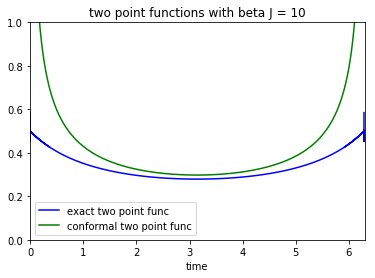

'\ncutOffIndex = 2 ** 12\n\ntheta = theta[cutOffIndex: 2 * numOfParticles - cutOffIndex]\ntwoPointFunction = twoPointFunction[cutOffIndex: 2 * numOfParticles - cutOffIndex]\napproxTwoPointFunc = approxTwoPointFunc[cutOffIndex: 2 * numOfParticles - cutOffIndex]\n\nsubleadingTwoPointFunc = []\nfor k in range(len(theta)):\n    component = J * J * (twoPointFunction[k] - approxTwoPointFunc[k])\n    subleadingTwoPointFunc.append(component)\n\nplt.grid(True)\nplt.plot(theta, subleadingTwoPointFunc)\nplt.title("Sub-leading order of two point function with $J = {}$".format(J))\nplt.show()\n'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dst
from sgnFunction import sgn


def discreteSineTransform(array):
    result = dst(array, type=2)

    return result


def inverseDiscreteSineTransform(array):
    # normalization factor
    f = 1.0 / (2 * len(array))

    result = dst(array, type=3)
    result = [k * f for k in result]

    return result


def isConvergentEnough(previousArray, nextArray, epsilon=0.0001):
    array = [abs(nextArray[n] - previousArray[n]) ** 2 for n in range(len(previousArray))]
    return sum(array) < epsilon


# ---------------------------------
# constant parameters of the system
# ---------------------------------
# The inverse temperature; we set its value to one for simplicity
beta = 1
# The scale of the random coupling tensor
J = 10
# Number of particles
numOfParticles = 2 ** 15
# Number of the interacting particles
q = 4
# Anomalous dimension
delta = 1.0 / q


# The speed of convergence of the Fourier series of the two point function
x = 1.0 / 2

# the real space
theta = [np.pi * k / numOfParticles for k in range(numOfParticles + 1)]


# -------------------------------------------
# Now let's iterate the Schwinger Dyson eq.
# -------------------------------------------

# The initial two point function is the free one.
twoPointFunction = [0.5 * k for k in sgn(theta)]
object = [1j * k for k in twoPointFunction]
transformedTwoPointFunction = inverseDiscreteSineTransform(object)

cnt = 0

while True:
    previousTwoPointFunction = twoPointFunction[:]

    selfEnergy = [J * J * (k ** (q - 1)) for k in twoPointFunction]
    object = [1j * k for k in selfEnergy]
    transformedSelfEnergy = inverseDiscreteSineTransform(object)

    nextTransformedTwoPointFunction = []
    for n in range(len(transformedSelfEnergy)):
        omega = 2 * np.pi * (n + 0.5)
        term1 = x / (- 1j * omega - transformedSelfEnergy[n])
        term2 = (1 - x) * transformedTwoPointFunction[n]
        nextTransformedTwoPointFunction.append(term1 + term2)

    transformedTwoPointFunction = nextTransformedTwoPointFunction[:]
    object = [-1j * k for k in transformedTwoPointFunction]
    twoPointFunction = discreteSineTransform(object)

    if isConvergentEnough(previousTwoPointFunction, twoPointFunction):
        print("The two point function was convergent enough at cnt = {}".format(cnt))
        break

    cnt += 1

twoPointFunction = [k.real for k in twoPointFunction]

theta = [np.pi * k / numOfParticles for k in range(2 * numOfParticles + 1)]
twoPointFunction = list(twoPointFunction[:-1:]) + list(twoPointFunction[-1::-1])

# -------------------------------------
# Conformal Two Point Function
# -------------------------------------

b = pow((0.5 - delta) * np.tan(np.pi * delta) / (J * J * np.pi), delta)
conformalTwoPointFunc = []
for k in range(len(theta)):
    component = b * pow(np.pi / np.sin(theta[k] * 0.5), 2 * delta)
    conformalTwoPointFunc.append(component)


# -------------------------------------------------------------
# Correction from the conformal limit to the exact solution
# -------------------------------------------------------------

alpha = 2 * (q - 2) / (16 / np.pi + 6.18 * (q - 2) + (q - 2) ** 2)
f0 = [2 + (np.pi - abs(k)) / np.tan(abs(k) * 0.5) for k in theta]
approxTwoPointFunc = []
for k in range(len(theta)):
    correctingTerm = np.sqrt(pow(2, q - 1) / q) * alpha * f0[k]
    component = conformalTwoPointFunc[k] * (1 - correctingTerm / J)
    approxTwoPointFunc.append(component)

plt.title("two point functions with beta J = {}".format(J))
plt.plot(theta, twoPointFunction, color="b", label="exact two point func")
plt.plot(theta, conformalTwoPointFunc, color="g", label="conformal two point func")
# plt.plot(theta, approxTwoPointFunc, "r")
plt.xlabel("time")
plt.xlim(0, 6.3)
plt.ylim(0, 1)
plt.legend()
plt.show()

# -------------------------------------------------------------
# Calculate the sub-leading order of large J
# -------------------------------------------------------------
"""
cutOffIndex = 2 ** 12

theta = theta[cutOffIndex: 2 * numOfParticles - cutOffIndex]
twoPointFunction = twoPointFunction[cutOffIndex: 2 * numOfParticles - cutOffIndex]
approxTwoPointFunc = approxTwoPointFunc[cutOffIndex: 2 * numOfParticles - cutOffIndex]

subleadingTwoPointFunc = []
for k in range(len(theta)):
    component = J * J * (twoPointFunction[k] - approxTwoPointFunc[k])
    subleadingTwoPointFunc.append(component)

plt.grid(True)
plt.plot(theta, subleadingTwoPointFunc)
plt.title("Sub-leading order of two point function with $J = {}$".format(J))
plt.show()
"""


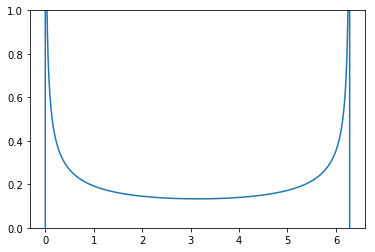

In [4]:
import numpy as np
import matplotlib.pyplot as plt

numOfParticles = 2 ** 15
theta = [np.pi * k / numOfParticles for k in range(2 * numOfParticles + 1)]

q = 4
delta = 1.0 / q
J = 50

b = pow((0.5 - delta) * np.tan(np.pi * delta) / (J * J * np.pi), delta)

conformalTwoPointFunc = []
for k in range(len(theta)):
    if k == 0 or k == len(theta) - 1:
        conformalTwoPointFunc.append(0)
    else:
        component = b * pow(np.pi / np.sin(theta[k] * 0.5), 2 * delta)
        conformalTwoPointFunc.append(component)

plt.plot(theta, conformalTwoPointFunc)
plt.ylim(0, 1)
plt.show()